# Data Analysis and Popularity prediction using Support Vector Machine

Music can be divided into genres (e.g., country music) and genres can be further divided into subgenres (e.g., country blues and pop country are two of the many country subgenres), although the dividing lines and relationships between music genres are often subtle, sometimes open to personal interpretation, and occasionally controversial. For example, it can be hard to draw the line between some early 1980s hard rock and heavy metal. Within the arts, music may be classified as a performing art, a fine art or as an auditory art. Music may be played or sung and heard live at a rock concert or orchestra performance, heard live as part of a dramatic work (a music theater show or opera), or it may be recorded and listened to on a radio, MP3 player, CD player, smartphone or as film score or TV show.

In many cultures, music is an important part of people's way of life, as it plays a key role in religious rituals, rite of passage ceremonies (e.g., graduation and marriage), social activities (e.g., dancing) and cultural activities ranging from amateur karaoke singing to playing in an amateur funk band or singing in a community choir. People may make music as a hobby, like a teen playing cello in a youth orchestra, or work as a professional musician or singer. The music industry includes the individuals who create new songs and musical pieces (such as songwriters and composers), individuals who perform music (which include orchestra, jazz band and rock band musicians, singers and conductors), individuals who record music (music producers and sound engineers), individuals who organize concert tours, and individuals who sell recordings, sheet music, and scores to customers. Even once a song or piece has been performed, music critics, music journalists, and music scholars may assess and evaluate the piece and its performance.

![](https://i.pinimg.com/originals/a4/d9/83/a4d983c5fbe14b4c63dd53d93fc2483f.jpg)

Spotify Technology S.A. is an international media services provider of Swedish origin. It is legally domiciled in Luxembourg and is headquartered in Stockholm, Sweden. Founded in 2006, the company's primary business is providing an audio streaming platform, the "Spotify" platform, that provides DRM-protected music, videos and podcasts from record labels and media companies. As a freemium service, basic features are free with advertisements or automatic music videos, while additional features, such as offline listening and commercial-free listening, are offered via paid subscriptions.

Launched on October 7, 2008, the Spotify platform provides access to over 50 million tracks. Users can browse by parameters such as artist, album, or genre, and can create, edit, and share playlists. Spotify is available in most of Europe and the Americas, Australia, New Zealand, and parts of Africa and Asia, and on most modern devices, including Windows, macOS, and Linux computers, and iOS, and Android smartphones and tablets. As of October 2019, the company had 248 million monthly active users, including 113 million paying subscribers.

Unlike physical or download sales, which pay artists a fixed price per song or album sold, Spotify pays royalties based on the number of artists streams as a proportion of total songs streamed. It distributes approximately 70% of its total revenue to rights holders, who then pay artists based on their individual agreements. Spotify has faced criticism from artists and producers including Taylor Swift and Thom Yorke, who have argued that it does not fairly compensate musicians. In 2017, as part of its efforts to renegotiate license deals for an interest in going public, Spotify announced that artists would be able to make albums temporarily exclusive to paid subscribers if the albums are part of Universal Music Group or the Merlin Network.

Spotify's international headquarters are in Stockholm, Sweden, though each region has its own headquarters. Since February 2018, it has been listed on the New York Stock Exchange and in September 2018, the company relocated its New York City offices to 4 World Trade Center.
[source](https://en.wikipedia.org/wiki/Spotify "Wikipedia")

![](https://images.indianexpress.com/2020/05/spotify-bloom-1200.jpg)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from pycaret.regression import *

In [ ]:
data = pd.read_csv("/kaggle/input/top50spotify2019/top50.csv",encoding="ISO-8859-1")

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.columns

In [ ]:
data['Genre'].unique()

In [ ]:
#Catplot
#It gives count of genre in spotify top 50 list. 
sns.catplot(y = "Genre", kind = "count",
            palette = "colorblind", edgecolor = ".6",
            data = data)
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x= data["Beats.Per.Minute"].values, y= data['Popularity'].values, size=10, kind="hex",)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel("Beats.Per.Minute", fontsize=12)
plt.title("Beats.Per.Minute Vs Popularity", fontsize=15);
#The purpose of this graph is to show connection among Beats and Popularity

In [ ]:
data.columns

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x= data['Loudness..dB..'].values, y= data['Popularity'].values, size=10, kind="kde",)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel("Beats.Per.Minute", fontsize=12)
plt.title("Beats.Per.Minute Vs Popularity", fontsize=15);
#The purpose of this graph is to show connection among loudness and Popularity

In [ ]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(data.corr(),vmax=1, vmin=-1,annot=True)

In [ ]:
#Pie charts 
labels = data['Artist.Name'].value_counts().index
sizes = data['Artist.Name'].value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
for i in data['Genre']:
    if "pop" in i:
        data['Genre'] = data['Genre'].replace(i,"pop")
    if "edm" in i:
        data['Genre'] = data['Genre'].replace(i,"edm")
    if "hip hop" in i: 
        data['Genre'] = data['Genre'].replace(i,"hip hop")
    if "room" in i:
        data['Genre'] = data['Genre'].replace(i,"other")
    if "r&b"  in i:  
        data['Genre'] = data['Genre'].replace(i,"other")
    if "reggae" in i:  
        data['Genre'] = data['Genre'].replace(i,"reggae")
    if "rap" in i:
        data['Genre'] = data['Genre'].replace(i,"hip hop")
    if "boy band" in i:
        data['Genre'] = data['Genre'].replace(i,"pop")
    if "brostep" in i:
        data['Genre'] =  data['Genre'].replace(i,"other")

In [ ]:
data['Genre'].unique()

In [ ]:
plt.figure(figsize=(16, 6))
data['Genre'].value_counts().plot(kind="bar", color = 'r')

In [ ]:
data.drop(['Track.Name', 'Artist.Name'], axis = 1, inplace = True)
data

In [ ]:
reg = setup(data = data, 
             target = 'Popularity',
             numeric_imputation = 'mean',
             categorical_features = ['Genre']  , 
             normalize = True,
             silent = True)

In [ ]:
compare_models()

In [ ]:
svm = create_model('svm')

# Residuals for SVR Model

In [ ]:
plot_model(svm)

![](![svm.png](attachment:svm.png))

# Prediction error for SVR

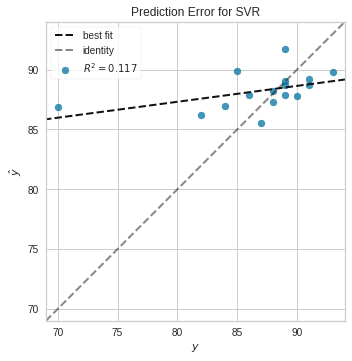

# Cook's distance outlier detection

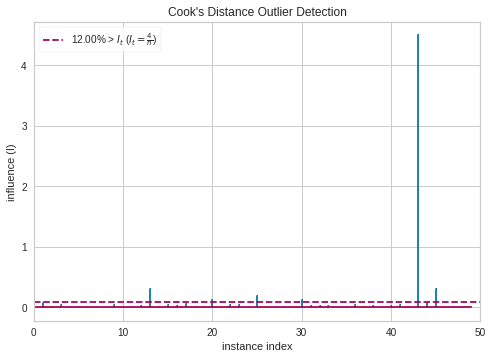

# Learning Curve for SVR

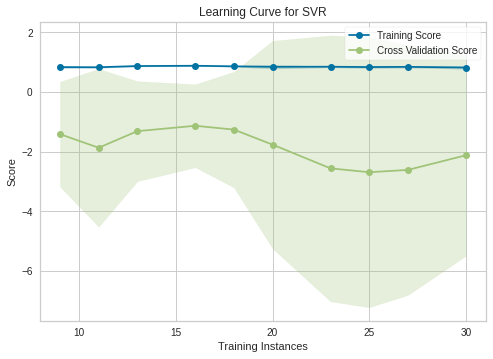

![](http://)

# Validation Curve for SVR

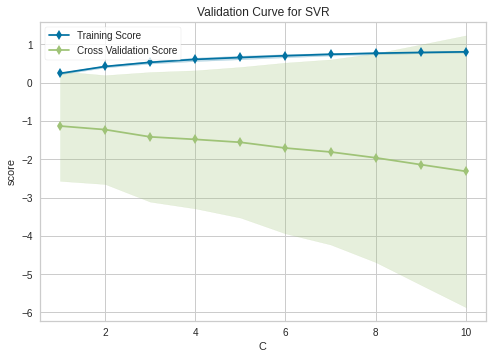

# Manifold Learning plot

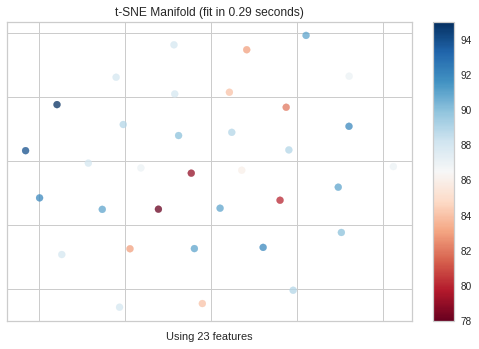